<a href="https://colab.research.google.com/github/bhawnakapoor/Zennovate/blob/main/Image_testing_Llava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Llava Setup**

In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 798.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm
import ast

max_new_tokens = 200

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Copy of Test Images.xlsx')

In [ ]:
df['Description_llava'] = None

In [ ]:
df

,url,Category,homepage_links,Subpage_links,Description_llava
0,pornhub.com,porn,[],[],None
1,xvideos.com,porn,[],[],None
2,xhamster.com,porn,[],[],None
3,xnxx.com,porn,[],[],None
4,eporner.com,porn,[],[],None
...,...,...,...,...,...
677,p37cannabis.com,Drugs,"['/media/AdobeStock_244008692.jpeg', '/media/b...","['/media/Gold-Dust.jpg', 'https://p37cannabis....",None
678,purlifenm.com,Drugs,[],[],None
679,dispensarynearmenm.com,Drugs,['https://static.wixstatic.com/media/50ecd4_31...,[],None
680,score420.store,Drugs,['https://development.score420.store/wp-conten...,[],None


In [ ]:


# image_text = ""

# for index, image_url in enumerate(image_links):
#   if index < 10 or index == len(image_links) - 1:
#     try:
#       image = Image.open(requests.get(image_url, stream=True).raw)
#     except Exception as e:
#       continue
#     prompt = "USER: <image>\nDescribe the image to me?\nASSISTANT:"
#     outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
#     text = outputs[0]["generated_text"]
#     assistant_text = text.split("ASSISTANT:")[1].strip()
#     image_text += f"{assistant_text}\n"
#   else:
#     break

# print(image_text)

In [ ]:
def format_image_url(image_url, base_url):
  if base_url not in image_url:
    image_url = 'https://' + base_url + image_url
  if 'http' not in image_url:
    image_url = 'https:' + image_url

  return image_url

  0%|          | 0/110 [00:00<?, ?it/s]

572

573

https://firehouse365.com/wp-content/uploads/2022/01/icon1.png
https://firehouse365.com/wp-content/uploads/2022/12/weed-munchies-maywood-dispensary-firehouse365.jpg
https://firehouse365.com/wp-content/uploads/2022/01/weed-edibles.png
https://firehouse365.com/wp-content/uploads/2022/11/cannabis-shatter-firehouse-maywood-dispensary.jpg
https://firehouse365.com/wp-content/uploads/2022/01/Screenshot_7.jpg
https://firehouse365.com/wp-content/uploads/2022/11/firehouse365-dispensary-maywood-california.jpg
https://firehouse365.com/wp-content/uploads/2023/01/maywood-weed-dispensary-firehouse-365.jpg
https://firehouse365.com/wp-content/uploads/2022/11/maywood-dispensary-gelato-weed-strain-firehouse365.jpg
https://firehouse365.com/wp-content/uploads/2022/01/leafbuyer.jpg
https://firehouse365.com/wp-content/uploads/2022/01/Dispensaries-Logo-1024x187-1.png


  3%|▎         | 3/110 [01:00<36:00, 20.20s/it]

574
The image features a green circle with a white outline. Inside the circle, there is a picture of a candy bar, possibly a Hershey's bar. The candy bar is placed in the center of the circle, and the overall design of the image is visually appealing and colorful.
The image features a plate with three delicious-looking muffins. Each muffin is topped with a marijuana leaf, adding a unique touch to the presentation. The muffins are placed on a dining table, and a cup can be seen nearby. The overall scene appears to be a casual and relaxed setting, with the muffins being the main focus of the image.
The image features a blue and pink package of a cannabis-infused gummy, likely a product called Kushy Punch. The gummy is designed to provide a full-spectrum gummy experience, with a combination of THC and CBD. The package is prominently displayed, showcasing the gummy's vibrant colors and enticing design.
The image features a close-up of a yellow substance, possibly a type of honey or a sauce

  4%|▎         | 4/110 [01:00<24:19, 13.76s/it]

576

https://smoakland.com/_next/image?url=https%3A%2F%2Fmedia.graphassets.com%2Foutput%3Dformat%3Awebp%2FLe6gtijISA69Um6xnKvL&w=3840&q=90
https://smoakland.comdata:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
https://smoakland.comhttps://jadserve.postrelease.com/conversion?ntv_pixel_id=4ade08cd3e0a4d1bac4f6aa989097293&ntv_pixel_value=[optional_float]&ord=[cache_buster]
https://smoakland.com/_next/static/images/smoakland_black-d61831466a7635ab5603a40af33ad79e.png
https://smoakland.com/_next/image?url=https%3A%2F%2Fmedia.graphassets.com%2Foutput%3Dformat%3Awebp%2FiDYpor2R9WUQIR2h0VuC&w=3840&q=90
https://smoakland.com/_next/image?url=https%3A%2F%2Fmedia.graphassets.com%2Foutput%3Dformat%3Awebp%2F2RgMJ2MMTQSo4mJLyzZe&w=3840&q=90
https://smoakland.com/_next/image?url=https%3A%2F%2Fmedia.graphassets.com%2Foutput%3Dformat%3Awebp%2FJ03a9YBnRHynuANcKVHG&w=3840&q=90


  6%|▋         | 7/110 [01:33<19:19, 11.26s/it]

577
The image features a basket filled with various Easter-themed items. Inside the basket, there are two colorful eggs, a candy, and a pack of cigarettes. The basket is placed on a dining table, and the items are arranged in a visually appealing manner. The scene appears to be a display of Easter goodies, with the cigarettes being an unexpected addition to the mix.
The image is a black and white photo of a word, possibly "smoke," with a white background. The word is prominently displayed in the foreground, and the contrast between the white word and the black background creates a striking visual effect. The simplicity of the image, with no additional elements, emphasizes the word and its bold presence.
The image features a bag of marijuana, specifically a bag of Smokeland marijuana. The bag is prominently displayed in the foreground, with a close-up view of the marijuana. The bag is placed on a cloudy background, which adds a sense of depth to the scene. The marijuana appears to be of

  8%|▊         | 9/110 [02:37<30:37, 18.19s/it]

579
The image features a logo for a music app called "Plug." The logo is a combination of a blue circle and a white letter "P." The blue circle is located in the top left corner of the image, while the white letter "P" is positioned in the bottom right corner. The logo is displayed on a white background, making it stand out.
The image features a bright green and red comic book-style bubble, possibly representing a popsicle. The bubble is filled with a colorful and lively scene, possibly depicting a character or an action taking place. The overall atmosphere of the image is vibrant and engaging, likely capturing the attention of the viewer.
The image features a man with a beard and mustache, wearing a green shirt. He appears to be staring intently, possibly at the camera. The man's facial hair and the green shirt give him a distinctive and rugged appearance.
The image features a yellow and green sign with the word "Graulix" written on it. The sign is placed on a green background, which 

  9%|▉         | 10/110 [02:39<22:56, 13.76s/it]

581

https://www.goldenwe.com/wp-content/uploads/2023/04/73ce79_b73ca0167ebe4d83b6ed3dd66ca9a9a7mv2.png
https://www.goldenwe.com/wp-content/uploads/2023/04/85dcf2_9789fa9185784fc6ba674b9d7ffc412fmv2.png
https://goldenwe.com/wp-content/uploads/2023/04/73ce79_3c56effb401c4e8c989abab276d0ba35mv2.webp
https://www.goldenwe.com/wp-content/uploads/2023/04/85dcf2_50b55409d7634a1e9a93dfb749aae53dmv2.png
https://www.goldenwe.com/wp-content/uploads/2024/03/85dcf2_28a1932804db41d7b39a023313080de3mv2-min-1.png
https://www.goldenwe.com/wp-content/uploads/2023/04/85dcf2_faca3869f13545ab94a631cef2fe0e52mv2.png
https://www.goldenwe.com/wp-content/uploads/2023/04/85dcf2_373339fa28f74032bd8fdea0b1a07cadmv2.png
https://www.goldenwe.com/wp-content/uploads/2024/02/STIIIZY-LIIIL---Hardcore-OG--I--1-1200x1200-28e5ebb-aa38744c-22df-43c6-8c6a-45712d56cfc0-300x300.png
https://www.goldenwe.com/wp-content/uploads/2024/02/CA-WATERMELON-Z-ALL-IN-ONE-1G-THC-PEN-1-1200x1200-28e5ebb-6c8dee80-1c3d-488b-9aed-529357ce3261

 10%|█         | 11/110 [04:37<1:12:07, 43.71s/it]

582
The image features a large, colorful, and detailed image of a marijuana leaf. The leaf is prominently displayed in the center of the image, with its vibrant colors and intricate details making it the focal point. The leaf is surrounded by a few smaller leaves, creating a visually appealing composition. The overall effect is a striking and eye-catching representation of the marijuana plant.
The image features a blue logo for a company called Cookie. The logo is a combination of a blue letter "C" and a blue letter "O," creating a visually appealing design. The blue color of the logo stands out against a white background, making it easily recognizable.
The image features a black and white logo for a company, possibly Amazon. The logo is a smiley face, which is a recognizable symbol for the brand. The logo is displayed prominently in the center of the image, with a white background surrounding it. The overall design of the logo is simple and visually appealing.
The image features a yel

 11%|█         | 12/110 [05:09<1:05:55, 40.37s/it]

https://rgreenleaf.comhttps://product-assets.iheartjane.com/cdn-cgi/image/width=174,fit=scale-down,format=auto,metadata=none/photos/39/88/39883d68-218e-47e4-8dd0-0f473cfa468f.png
583
The image features a close-up view of a spoonful of honey, with the spoon being filled with the honey. The honey appears to be dripping off the spoon, creating a visually appealing scene. The spoon is positioned in the center of the image, and the honey seems to be flowing down the spoon, creating a sense of motion.
The image features a close-up of a red candy, possibly a jelly bean, sitting on a black background. The candy is the main focus of the image, and it appears to be a delicious treat. The contrast between the red candy and the black background creates a visually appealing scene.
The image features a wooden table with two bowls filled with marijuana. One bowl is placed on the left side of the table, while the other is on the right side. The marijuana in the bowls appears to be of various sizes and

 12%|█▏        | 13/110 [05:10<46:19, 28.66s/it]  

https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/cb87f4f19f3189487d77d523ed16e091.jpeg?width=592&height=576
https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/8c69baaf50e7660d414c413a665cfb9f.png?width=592&height=576
https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/f690d6eb09825bae2a2ba323cd061b5b.jpeg?width=592&height=576
https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/9fa8df08494af092f21e9274a8ba5acb.jpeg?width=592&height=576
https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/60faa35490b5378abb2a7fb9b48b7464.png?width=592&height=576
https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/020e4a716c50896b117f70036d8c4f5f.jpeg?width=592&height=576
https://thecannabisreup.comhttps://dr5urbp0m8lal.cloudfront.net/1/product_photo/e8a52e87ee4c8abbfdc5525f0372a851.jpeg?width=592&height=576
https://thecannabisreup.comht

 13%|█▎        | 14/110 [05:15<34:58, 21.86s/it]

585

https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/Berry-Pie-Cookie-277c7848-ef97-4428-b355-967c8cf84088.jpg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/Jack-Herer-Jefferey-5pack-ee0495ff-0d7e-4820-912e-60b06c95a738.jpg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/Liquid-Diamond-Pod-INDICA-1g-e8e848ce-1b0d-40e1-8f7d-c56c56f6dca4.jpeg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/Jack-Herer-CUREbar-4d517903-13e5-486d-8540-e06b542df75c.jpg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/Cereal-Milk-Crispy-Marshmallow-Treat-09b59711-cbe2-4c0c-9e5c-4701c0319421.jpg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/2231764_P_B_CA_1to3BodyOil_Bottle_ProductImage_Directory_02-99c1f0e1-6c8d-4482-ad3d-03e9e40efea1.jpeg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/d0804146-b040-47be-9ded-5635b5f7b536.jpg
https://nexusdelivers.comhttps://tymber-blaze-products.imgix.ne

 15%|█▍        | 16/110 [05:21<18:45, 11.97s/it]

https://nexusdelivers.comhttps://tymber-blaze-products.imgix.net/99b6616e-b315-449f-aa80-d59633dde18e.jpeg
586
The image is a close-up of a purple background, which appears to be a wall or a piece of artwork. The purple color is dominant, creating a visually striking scene. The purple hue is evenly distributed throughout the image, giving it a uniform and vibrant appearance.

https://santaana-jaderoom.comhttps://dispense-images.imgix.net/fe21d8f0-d6e5-11ee-a9bf-27d26ec94ced.png?auto=format%2Ccompress&fit=max&w=3840&q=70
https://santaana-jaderoom.comhttps://dispense-images.imgix.net/b9e532e0-1629-11ee-8e3f-a7203857e2df.png?ixlib=js-2.3.2&w=auto&quality=75&auto=format%2Ccompress&max-h=40
https://santaana-jaderoom.comhttps://dispense-images.imgix.net/697f67e0-280c-11ee-aa55-49b5887cf9f2.png?auto=format%2Ccompress&fit=max&w=3840&q=70
https://santaana-jaderoom.comhttps://dispense-images.imgix.net/5d952950-16f1-11ee-956e-2beec046b13d.png?ixlib=js-2.3.2&h=60&w=60&quality=75&auto=format%2Ccomp

 15%|█▌        | 17/110 [05:22<13:16,  8.57s/it]

https://crafted7.comhttps://static.wixstatic.com/media/b68aa2_56398da4743e493c81fbf167dccf878d~mv2.jpg/v1/fill/w_183,h_183,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/CRAFTED7-2(F).jpg
https://crafted7.comhttps://static.wixstatic.com/media/b68aa2_a6b8731ec29f4e3ea38210d22d6508a2~mv2.png/v1/fill/w_246,h_141,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/b68aa2_a6b8731ec29f4e3ea38210d22d6508a2~mv2.png
https://crafted7.comhttps://static.wixstatic.com/media/b68aa2_d6980033f3574c90b0ff7e28041425cc~mv2.png/v1/fill/w_249,h_141,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/b68aa2_d6980033f3574c90b0ff7e28041425cc~mv2.png
https://crafted7.comhttps://static.wixstatic.com/media/b68aa2_d086afa15b4741c3b9762f301a934b46~mv2.png/v1/fill/w_249,h_141,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/wixbutton_carts.png
https://crafted7.comhttps://static.wixstatic.com/media/b68aa2_15d6a56394f04aee876d70da742b8550~mv2.png/v1/fill/w_249,h_141,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/dealsNsteals-wixbutton.png
https://crafted7.comhttps://static

 17%|█▋        | 19/110 [06:27<29:41, 19.58s/it]

https://lofidelivery.com/wp-content/uploads/2022/09/banner.png
https://lofidelivery.com/wp-content/uploads/2024/03/Sour-Peach-Fast-Acting-Diamond-Infused-Gummies-1.png
https://lofidelivery.com/wp-content/uploads/2024/03/Oasis-Mints-Naked-Prerolls-14pk-1.jpg
https://lofidelivery.com/wp-content/uploads/2022/09/cars.png
https://lofidelivery.com/wp-content/uploads/2023/03/Level-Logo.png
https://lofidelivery.com/wp-content/uploads/2022/10/Flav-Logo.png
https://lofidelivery.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20500%20500'%3E%3C/svg%3E
https://lofidelivery.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201600%20701'%3E%3C/svg%3E
https://lofidelivery.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20900%20900'%3E%3C/svg%3E
https://lofidelivery.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20161%20327'%3E%3C/svg%3E
https://lofidelivery.com/wp

 18%|█▊        | 20/110 [07:51<53:37, 35.75s/it]

https://lofidelivery.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20576%20576'%3E%3C/svg%3E
591
The image features a cityscape at night, with a beautiful view of the city lights. The sky is filled with colorful lights, creating a vibrant atmosphere. There are several lights scattered throughout the scene, with some closer to the foreground and others further away.

In the foreground, a potted plant is placed on a balcony, adding a touch of greenery to the urban setting. The combination of the city lights and the potted plant creates a harmonious and visually appealing scene.
The image features a box of Sour Peach Fast-Acting Gum, which is a popular gum brand. The box is open, revealing the gum inside. There are two pieces of gum visible in the box, one on the left side and the other on the right side. The gum appears to be in good condition, with no signs of damage or wear.
The image features a container of marijuana, possibly a pre-rolled joint, s

 19%|█▉        | 21/110 [07:52<39:21, 26.53s/it]

https://par3greens.comhttps://static.wixstatic.com/media/da9d7d_1fa389b72cb749cdb0906ad6aafa007d~mv2.png/v1/fill/w_80,h_80,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Picture1.png
https://par3greens.comhttps://static.wixstatic.com/media/da9d7d_3ec320ffe84842fb804d7a78d2cc8dae~mv2.jpeg/v1/fill/w_123,h_80,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/da9d7d_3ec320ffe84842fb804d7a78d2cc8dae~mv2.jpeg
https://par3greens.comhttps://static.wixstatic.com/media/da9d7d_f933341c43994a0ba0d65ad336b73150~mv2.png/v1/fill/w_49,h_33,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/da9d7d_f933341c43994a0ba0d65ad336b73150~mv2.png
592

593

594

https://i0.wp.com/tracycannabisco.com/wp-content/uploads/2023/05/cropped-cropped-untitled-1200-c397-300-px-1200-c397-300-px.png?fit=1031%2C935&ssl=1


 22%|██▏       | 24/110 [07:58<19:34, 13.65s/it]

595
The image features a green and gold logo, possibly representing a company or organization. The logo is composed of multiple diamond shapes, which are arranged in a visually appealing manner. The diamond shapes are scattered throughout the logo, creating a sense of depth and complexity. The overall design of the logo is both modern and sophisticated, making it an attractive symbol for the represented entity.

596

https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2024/02/11.15_hero_mobile@2x.png


 24%|██▎       | 26/110 [07:59<12:51,  9.19s/it]

https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2021/11/stars-quote-widget.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2022/06/globe.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2023/02/free-hook_qrc.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2024/02/11.15_hero_desktop@2x.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2023/02/02_lib-onboarding@2x.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2023/06/qr-codes-lp-metrics.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2023/11/novasol.png
https://bit.lyhttps://docrdsfx76ssb.cloudfront.net/static/1710957969/pages/wp-content/uploads/2023/11/curology.png
https://bit.lyhttps://docrdsfx76s

 26%|██▋       | 29/110 [07:59<07:15,  5.38s/it]

598

599

600

601

https://dube.delivery/wp-content/uploads/2024/03/Dube-Delas-3-jpg.webp
https://dube.delivery/wp-content/uploads/2023/09/mobile-app-order-jpg.webp
https://dube.delivery/wp-content/uploads/2021/09/grocery-delivery-icon-16.png
https://dube.delivery/wp-content/uploads/2021/09/grocery-delivery-icon-051.png
https://dube.delivery/wp-content/uploads/2023/09/dube-east-bay-cannabis-delivery-oakland.png
https://dube.delivery/wp-content/uploads/2021/09/Dube-LogoWEB.png
https://dube.delivery/wp-content/uploads/2023/09/oakland-dube-delivery-jpg.webp
https://dube.delivery/wp-content/uploads/2023/09/dube-cart-jpg.webp
https://dube.delivery/wp-content/uploads/2023/09/order-delivery-06-2-jpg.webp
https://dube.delivery/wp-content/uploads/2021/09/grocery-delivery-icon-08.png


 28%|██▊       | 31/110 [08:49<14:23, 10.93s/it]

602
The image features a blue truck driving down a road. The truck is prominently displayed in the scene, occupying a large portion of the image. The truck is driving on a highway, and the road appears to be clear and unobstructed. The overall atmosphere of the image suggests a sense of freedom and adventure, as the truck travels down the road.
The image features a person, likely a woman, standing in front of a display of marijuana products. She is pointing at one of the marijuana products, possibly a marijuana leaf or a marijuana-themed item. The display is filled with various marijuana-related items, including a cell phone and a TV. The scene appears to be a casual and relaxed environment, possibly a store or a convention.
The image features a collection of four different colored and designed cards. These cards are arranged in a visually appealing manner, with each card occupying a different color and design. The cards are placed next to each other, creating an interesting and colorf

 29%|██▉       | 32/110 [09:38<22:38, 17.41s/it]

603
The image features a green circle with a white letter "B" in the center. The letter is prominently displayed, and the circle itself is quite large, occupying most of the image. The circle's design and the letter's placement create a visually appealing and distinctive appearance.
The image is a black and white pixel art of a word, possibly "dolor." The word is displayed in a large, bold font, occupying most of the image. The overall effect is a striking and visually appealing design.
The image features a dog lying on a bed, surrounded by stuffed animals. The dog is positioned in the center of the scene, with a stuffed teddy bear on its left side and another stuffed animal on its right side. The dog appears to be enjoying the company of the stuffed animals.
The image features a green circle with a white letter "D" in the center. The letter is prominently displayed, and the circle itself is quite large, occupying most of the image. The green color of the circle adds a vibrant touch to

 33%|███▎      | 36/110 [09:39<09:56,  8.06s/it]

606

https://cbcbberkeley.comhttps://static.wixstatic.com/media/04d672_1590562d8b2640a2974c0950de0c40a9~mv2.jpg/v1/crop/x_0,y_0,w_2279,h_999/fill/w_61,h_27,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/Speciale_LogoBlackScript.jpg
https://cbcbberkeley.comhttps://static.wixstatic.com/media/04d672_65b40012ae9d4e4bbf6412c1b2673842~mv2.jpg/v1/fill/w_177,h_164,al_c,q_80,usm_0.66_1.00_0.01,blur_3,enc_auto/CBCB%20LOGO%20solo.jpg
https://cbcbberkeley.comhttps://static.wixstatic.com/media/nsplsh_7df34b93af3a4772ba1c126e63e3eefb~mv2.jpg/v1/fill/w_43,h_64,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/nsplsh_7df34b93af3a4772ba1c126e63e3eefb~mv2.jpg
https://cbcbberkeley.comhttps://static.wixstatic.com/media/04d672_65b40012ae9d4e4bbf6412c1b2673842~mv2.jpg/v1/fill/w_90,h_83,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/CBCB%20LOGO%20solo.jpg
https://cbcbberkeley.comhttps://static.wixstatic.com/media/04d672_05e32cbae992436fac5f812f18250251~mv2.jpeg/v1/crop/x_0,y_62,w_2000,h_373/fill/w_127,h_24,al_c,q_80,usm_0.6

 34%|███▎      | 37/110 [09:51<10:45,  8.84s/it]

608
The image features a man holding a marijuana cigarette in his hand. He is wearing a jacket and appears to be enjoying the moment. The scene is set in a room with a few other people present.

There are three other people in the room, one on the left side, another in the middle, and the third person on the right side. The man holding the marijuana cigarette is the main focus of the scene, and the other people are in the background, possibly engaging in conversation or other activities.
The image features a person holding a marijuana cigarette in their hand. The marijuana is placed in the center of the scene, with the person's hand surrounding it. The scene is set against a backdrop of a blue ocean, creating a serene and relaxing atmosphere.

https://thchi.shophttps://static.wixstatic.com/media/db4e22_acd9567e07bc4b4a8897dcab2c8c9ae9~mv2.jpg/v1/fill/w_1402,h_276,al_c,q_85,enc_auto/HeaderLeaf_edited.jpg


 35%|███▍      | 38/110 [09:52<08:34,  7.15s/it]

https://thchi.shophttps://static.wixstatic.com/media/db4e22_773903639d7a4f33a1c6328c72621315~mv2.jpg/v1/fill/w_147,h_82,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/db4e22_773903639d7a4f33a1c6328c72621315~mv2.jpg
https://thchi.shophttps://static.wixstatic.com/media/db4e22_cac4cfabba2c4db495ad382bc7f1ce2f~mv2.jpg/v1/fill/w_1406,h_282,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/LeafHeaderwithTHC_edited.jpg
https://thchi.shophttps://static.wixstatic.com/media/db4e22_4bf7126260274b618a91846a5825d4c5~mv2.jpg/v1/fill/w_70,h_75,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/db4e22_4bf7126260274b618a91846a5825d4c5~mv2.jpg
https://thchi.shophttps://static.wixstatic.com/media/db4e22_6a1fcd3f502e4cae91c96e33a1bbd6ed~mv2.jpg/v1/fill/w_974,h_140,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/HeaderLeaf_edited_edited.jpg
https://thchi.shophttps://static.wixstatic.com/media/db4e22_ba748f5a7e204bf487ecd81dc9c51e56~mv2.png/v1/fill/w_49,h_24,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/db4e22_ba748f5a7e204bf487ecd81dc9c

 35%|███▌      | 39/110 [09:52<06:35,  5.58s/it]

https://plantgalaxy.net/media/PG-White.png
https://plantgalaxy.net/media/PG-Green.png
https://plantgalaxy.net/media/tiktok.png


 37%|███▋      | 41/110 [10:07<06:49,  5.93s/it]

611
The image features a green logo for a marijuana company. The logo is a stylized image of a marijuana plant, with a leaf and a bud prominently displayed. The design is simple yet effective in conveying the company's message. The logo is displayed on a green background, which complements the plant-themed design.
The image features a green logo for a marijuana-related business. The logo is a stylized image of a marijuana plant, with a leaf and a bud prominently displayed. The plant is surrounded by a few smaller leaves, creating a visually appealing design. The logo is displayed in a green color, which is consistent with the theme of the marijuana-related business.
The image features a bright green background, which appears to be a wall or a piece of artwork. The green color is vibrant and covers most of the background. The overall effect is a lively and fresh atmosphere.

https://familydeliveries.comhttps://static.wixstatic.com/media/7bb75f_39f0527c24e64aad9e947a89734ac680~mv2.jpg/v1

 38%|███▊      | 42/110 [10:08<04:57,  4.38s/it]

https://sipkoi.comhttps://static.wixstatic.com/media/427c21_6a5f30af55954ed5bb5dcde84e80d050~mv2.jpg/v1/fill/w_313,h_313,q_90/427c21_6a5f30af55954ed5bb5dcde84e80d050~mv2.jpg
https://sipkoi.comhttps://static.wixstatic.com/media/427c21_19aa380b1eb5417e8ee28e0da4c690f5~mv2.jpg/v1/fill/w_313,h_313,fp_0.16_0.41,q_90/427c21_19aa380b1eb5417e8ee28e0da4c690f5~mv2.jpg
https://sipkoi.comhttps://static.wixstatic.com/media/9dfad5_ea33c40c95a34a5f8e1efd0042e117acf003.jpg/v1/fit/w_613,h_345,q_90/9dfad5_ea33c40c95a34a5f8e1efd0042e117acf003.jpg
https://sipkoi.comhttps://static.wixstatic.com/media/427c21_fe300377f5274135baa93826c724d08a~mv2.png/v1/fill/w_313,h_313,q_90/427c21_fe300377f5274135baa93826c724d08a~mv2.png
https://sipkoi.comhttps://static.wixstatic.com/media/11062b_2042bb7351284f0f982e4787d37415e6f000.jpg/v1/fill/w_147,h_83,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/11062b_2042bb7351284f0f982e4787d37415e6f000.jpg
https://sipkoi.comhttps://static.wixstatic.com/media/9dfad5_9bfb29647d8947ce8f4

 40%|████      | 44/110 [10:08<02:46,  2.53s/it]

https://westsidecllctv.nethttps://lh3.googleusercontent.com/nDjYFpw7AhVOqG0QfySUFkV8IdwiV5Z1raaQgbSPJTYeQM0v2NdS0O9Sye2zku5HEqZpititF6I24G8tBi6HM9PVvbuN_bnQaZaGf8rrtgRUxboRIBFa3NBBcYNCQEtQiw=w1280
615

https://lemonnade.com/wp-content/uploads/brizy/imgs/product-concentrate-288x256x22x0x244x256x1642636510.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/cropped-lemonnade-icon-512-77x77x0x0x77x77x1642628904.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/product-vape-239x316x0x0x202x316x1642636544.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/cropped-lemonnade-icon-512-141x141x0x0x141x141x1642628904.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/product-preroll-255x318x0x0x239x318x1642636485.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/product-flower-263x292x11x0x242x292x1642636464.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/lake-elsinore-text-777x360x0x13x777x335x1642634514.png
https://lemonnade.com/wp-content/uploads/brizy/imgs/L

 41%|████      | 45/110 [10:48<12:19, 11.37s/it]

616
The image features a box with a yellow background and a black logo. The box is filled with a product, possibly a cannabis extract, as it is labeled with a marijuana leaf. The box is placed on a surface, and the product inside appears to be a marijuana-related item.
The image features a yellow lemon with green leaves, likely a sticker or a logo. The lemon is prominently displayed in the center of the image, with its vibrant color and distinctive shape. The overall composition of the image is simple and focused on the lemon, making it the main subject.
The image features a yellow box with a picture of a lemon on it. The box is labeled "Lemonade," and it appears to be a carton of lemonade. The carton is placed on a table, and the lemon is prominently displayed on the front of the box. The overall scene suggests a refreshing and healthy beverage option.
The image features a stylized lemon with a green leaf on top. The lemon is prominently displayed in the center of the image, and the l

 42%|████▏     | 46/110 [10:58<11:54, 11.16s/it]

https://purplestarmd.comhttps://lh3.googleusercontent.com/a/AATXAJy_Q-9VsVBb4jGANXMJhOblMpGzDD2arfWMGdh3=s128-c0x00000000-cc-rp-mo
https://purplestarmd.comhttps://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/shopping-71.png
617
The image depicts a spacious store filled with various items, including a large number of bottles and a TV mounted on the wall. The store appears to be a dispensary or a shop selling marijuana products. The bottles are scattered throughout the store, with some placed on shelves and others on the floor.

There are two people in the store, one located near the left side of the image and the other person standing closer to the right side. The store also features a clock on the wall, providing a sense of time for the customers. The overall atmosphere of the store suggests a relaxed and comfortable environment for customers to explore and purchase the products.

https://maringardens.orgimages/2.webp
https://maringardens.orgimages/Marin_main_page-p-1600.jpeg
ht

 44%|████▎     | 48/110 [10:58<06:43,  6.51s/it]

https://usbloom.comhttps://static.wixstatic.com/media/426a51_9fae9e4a4be64ec4916255944cdaa4f0~mv2.jpg/v1/fit/w_265,h_265,q_90/426a51_9fae9e4a4be64ec4916255944cdaa4f0~mv2.jpg
619

https://marincbc.com//img1.wsimg.com/isteam/ip/157ae5f8-1e7d-4de0-a2e5-2b5d03261ed0/IMG_1097%20(2).JPG/:/rs=h:1000,cg:true,m
https://marincbc.com//img1.wsimg.com/isteam/stock/41653/:/rs=w:600,h:300,cg:true,m/cr=w:600,h:300
https://marincbc.comdata:image/gif;base64,R0lGODlhAQABAAD/ACwAAAAAAQABAAACADs=
https://marincbc.com//img1.wsimg.com/isteam/ip/157ae5f8-1e7d-4de0-a2e5-2b5d03261ed0/IMG_1154.JPG/:/cr=t:9.24%25,l:0%25,w:100%25,h:48.32%25/rs=w:600,h:300,cg:true
https://marincbc.com//img1.wsimg.com/isteam/ip/157ae5f8-1e7d-4de0-a2e5-2b5d03261ed0/IMG_0752%20(2).jpg/:/cr=t:31.25%25,l:0%25,w:100%25,h:37.5%25/rs=w:600,h:300,cg:true
620



 45%|████▍     | 49/110 [10:59<05:16,  5.19s/it]

https://shopgpo.comhttps://static.wixstatic.com/media/8ee79b_296e36b2a1a043ff8cabce3e043baedb~mv2.png/v1/crop/x_58,y_0,w_550,h_537/fill/w_54,h_52,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/Screenshot%202023-05-30%20170134.png
https://shopgpo.comhttps://static.wixstatic.com/media/8ee79b_b2c2eb1d9c5d43e49bfd5d52e9c774fa~mv2.png/v1/crop/x_0,y_10,w_555,h_542/fill/w_54,h_52,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/Screenshot%202023-05-30%20165922.png
https://shopgpo.comhttps://static.wixstatic.com/media/8ee79b_ef679744c0ae4400bd88fede6c076874~mv2.jpg/v1/crop/x_14,y_0,w_401,h_392/fill/w_54,h_53,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/jelly-donut-grizzly-peak%20(2)_edited.jpg
https://shopgpo.comhttps://static.wixstatic.com/media/8ee79b_ff316ad93ea0451a9d74dca8a24a6159~mv2.png/v1/crop/x_18,y_0,w_430,h_420/fill/w_54,h_53,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/Screenshot%202023-05-30%20170325.png
https://shopgpo.comhttps://static.wixstatic.com/media/11062b_54f8c51ecd404d99910d95

 45%|████▌     | 50/110 [10:59<03:58,  3.97s/it]

https://shopgpo.comhttps://static.wixstatic.com/media/8ee79b_8f29c70278b14b3ba6e43d72cc56c599~mv2.png/v1/crop/x_1,y_8,w_642,h_488/fill/w_770,h_585,al_c,lg_1,q_90,enc_auto/8ee79b_8f29c70278b14b3ba6e43d72cc56c599~mv2.png
https://shopgpo.comhttps://static.wixstatic.com/media/8112d5_b542a2c298c9437ba765fd331d11f6a5~mv2.png/v1/fit/w_473,h_234,q_90/8112d5_b542a2c298c9437ba765fd331d11f6a5~mv2.png
https://shopgpo.comhttps://static.wixstatic.com/media/8112d5_38e01d83bdf544199e839b825351e841~mv2.png/v1/fit/w_473,h_234,q_90/8112d5_38e01d83bdf544199e839b825351e841~mv2.png
https://shopgpo.comhttps://static.wixstatic.com/media/8ee79b_d9cd055afedc4db0a448ec67bd9bab46~mv2.png/v1/crop/x_0,y_8,w_761,h_743/fill/w_54,h_52,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111.png
https://shopgpo.comhttps://static.wixstatic.com/media/8112d5_3c3f3711b8444232bfa9cdf3f04996f5~mv2.jpg/v1/fill/w_288,h_162,al_c,q_80,usm_0.66_1.00_0.

 49%|████▉     | 54/110 [11:00<01:33,  1.67s/it]

https://kingscrew.com/_next/image?url=https%3A%2F%2Fproduct-assets.iheartjane.com%2Fphotos%2F25%2F4e%2F254e01fa-b333-4297-bc5b-f46b3dda04ce.jpeg&w=3840&q=75
https://kingscrew.com/_next/image?url=https%3A%2F%2Fproduct-assets.iheartjane.com%2Fphotos%2F1f%2F11%2F1f11cf69-f67c-47c0-8270-f0a5a075315e.jpeg&w=3840&q=75
https://kingscrew.comhttps://images.prismic.io/kingscrew/0ec3669e-82de-4aa1-8104-9b5fe7a7b524_KingsCrew_Interior2-1.jpg?auto=compress%2Cformat&fit=max&w=3840
https://kingscrew.com/_next/image?url=https%3A%2F%2Fproduct-assets.iheartjane.com%2Fphotos%2F5a%2F0b%2F5a0b1b5c-852e-46ef-93ae-16efc2f63445.jpeg&w=3840&q=75
https://kingscrew.com/_next/image?url=https%3A%2F%2Fproduct-assets.iheartjane.com%2Fphotos%2F73%2Fd0%2F73d0d2ed-6875-4578-8e72-260e6799b666.jpeg&w=3840&q=75
https://kingscrew.com/_next/image?url=https%3A%2F%2Fuploads.iheartjane.com%2Fuploads%2F6f37b439-8025-4fe3-9686-7d7f1a6a9fbf.jpg&w=3840&q=75
https://kingscrew.comhttps://images.prismic.io/kingscrew/eb801d0b-7900-4ec

 50%|█████     | 55/110 [11:49<09:09,  9.99s/it]

https://kingscrew.com
https://kingscrew.com
626
The image features a green bag filled with a variety of dried fruits. The bag is placed on a table, and the fruits inside are visible, showcasing the different types of dried fruit. The bag appears to be a dime bag, which is a popular way to carry and store dried fruits. The assortment of dried fruits in the bag offers a colorful and healthy snack option.
The image features a close-up of a pile of marijuana, showcasing its various strains and colors. The marijuana is displayed in a way that highlights its different types and textures. The close-up view of the marijuana allows the viewer to appreciate the intricate details of the plant and its components.
The image features a white and green surfboard, which is the main focus of the scene. The surfboard is placed on a stand, making it the center of attention. The stand is positioned in the middle of the image, with the surfboard occupying most of the frame. The overall scene appears to be 
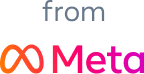
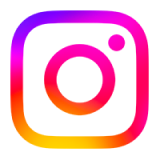

 51%|█████     | 56/110 [12:07<10:27, 11.62s/it]

https://crystalnugs.comhttps://woo.com/wp-content/uploads/2014/11/feature-2.jpg
https://crystalnugs.comhttps://woo.com/wp-content/uploads/2016/09/feature-1.jpg
https://crystalnugs.comhttps://woo.com/wp-content/uploads/2014/11/Storefront_icon-marketplace-160x160-1.png
https://crystalnugs.comhttps://woo.com/wp-content/uploads/2014/11/feature-3.jpg
627
The image features a large, green, and white logo for Crystal Geyser. The logo is prominently displayed in the center of the image, with a slightly darker green color. The overall design of the logo is clean and modern, making it an attractive visual element.
The image features a black and white advertisement for a new strain of marijuana called "Peach Candy." The advertisement is prominently displayed, likely on a billboard or a similar medium. The advertisement is likely meant to attract potential customers and promote the new strain of marijuana.
The image features a green and white logo for Crystal Geyser. The logo is prominently displa

 53%|█████▎    | 58/110 [12:08<06:27,  7.45s/it]

https://drgreenrx.comhttps://static.wixstatic.com/media/00a81f_09e729df6ab14823845b8370efbc69ad~mv2.png/v1/fill/w_58,h_59,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/Untitled-1.png
https://drgreenrx.comhttps://static.wixstatic.com/media/00a81f_f26cb9042a33458589eb5f4414cee424~mv2.png/v1/fill/w_121,h_27,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/drgx.png
https://drgreenrx.comhttps://static.wixstatic.com/media/da6a47_a21a130082394b65bc8c8d66c796b5a3~mv2.png/v1/fill/w_75,h_76,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/391850501_Logo-nominee.png
629

https://instagram.com
https://instagram.com
630


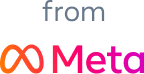
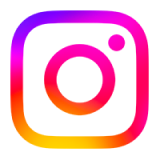

 55%|█████▍    | 60/110 [12:08<04:07,  4.94s/it]

631

632

633

https://ezweedzy.com//img1.wsimg.com/isteam/ip/bf379a3f-d8f5-45f2-a716-47b4599b40c1/800.png/:/cr=t:0%25,l:27.48%25,w:45.04%25,h:100%25/rs=w:388,h:388,cg:true
https://ezweedzy.com//img1.wsimg.com/isteam/ip/bf379a3f-d8f5-45f2-a716-47b4599b40c1/800.png/:/rs=w:388,h:388,cg:true,m/cr=w:388,h:388
https://ezweedzy.com//img1.wsimg.com/isteam/ip/bf379a3f-d8f5-45f2-a716-47b4599b40c1/blob-0b8eb6f.png/:/rs=h:200,cg:true,m/qt=q:95


 57%|█████▋    | 63/110 [12:08<02:17,  2.94s/it]

634

https://cannacouriers.net/wp-content/uploads/2023/03/loyal-customer.png
https://cannacouriers.net/wp-content/uploads/2023/03/chat-balloon.png
https://cannacouriers.net/wp-content/uploads/2023/03/best-price.png
https://cannacouriers.net/wp-content/uploads/2023/03/cannabis.png


 58%|█████▊    | 64/110 [12:27<04:19,  5.64s/it]

635
The image features a green hand holding a green star. The hand is positioned in the center of the image, with the star located above it. The green color of both the hand and the star creates a visually appealing contrast. The hand and the star are the main focus of the image, with no other objects or elements visible.
The image features a green and white speech bubble, which is a symbol for a conversation. The bubble is filled with green and white colors, giving it a vibrant and lively appearance. The speech bubble is prominently displayed in the scene, likely representing a conversation or discussion.
The image features a green and white hand giving a thumbs up. The hand is positioned in the center of the image, with the thumb pointing upwards. The thumbs up gesture is a common symbol of approval, agreement, or encouragement.
The image features a green leaf, possibly a marijuana leaf, prominently displayed in the center of the picture. The leaf is surrounded by a circle, which add

 63%|██████▎   | 69/110 [12:40<02:34,  3.76s/it]

https://wehikei.comdata:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
639
The image features a close-up of a black and green container, possibly a jar or a can, containing a product. The container is filled with a green substance, which appears to be a type of flower. The product seems to be a hand-trimmed, premium indoor flower, possibly a marijuana-based product. The container is placed on a surface, and the focus is on the unique and colorful flower inside.
The image features a large, bold sign that reads "Daily Deals." The sign is prominently displayed, likely in a store or a commercial area. The sign is placed in the center of the image, drawing attention to the deals available every day. The sign's design is eye-catching and likely to attract customers to the store or business.

640

https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/2844892.png


 64%|██████▎   | 70/110 [12:40<02:05,  3.13s/it]

https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/2151354.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/2733829.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/3031963.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/2776522.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/3123674.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/3031868.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/3031871.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/3026166.png
https://goldenstategreens.comhttps://goldenstatediscounts.com/POS-Images/3131526.png
641

https://palmroyalecollective.comhttps://static.wixstatic.com/media/f2b89b_2463710c161f4b238a1820c8a501e8fdf000.jpg/v1/fill/w_288,h_162,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/f2b89b_2463710c161f4b238a1820c8a501e8fdf000.jpg
ht

 65%|██████▌   | 72/110 [12:40<01:20,  2.11s/it]

https://reefermadnesslounge.comdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAJCAIAAAC0SDtlAAAAGklEQVQYlWP8//8/AymAiSTVoxpoooGBgQEAMWADDx3noXgAAAAASUVORK5CYII=
https://reefermadnesslounge.comhttps://static.wixstatic.com/media/20c98e_0a55299798eb49858e41567d441fed13~mv2.png/v1/fill/w_440,h_179,al_c,lg_1,q_85,enc_auto/ReeferrMadness_SpiralRabbit.png
https://reefermadnesslounge.comhttps://static.wixstatic.com/media/d43980_90bf37b6f90f4659ba53942932aa5fe3f002.jpg/v1/fill/w_868,h_488,enc_auto/file.jpeg 1x, https://static.wixstatic.com/media/d43980_90bf37b6f90f4659ba53942932aa5fe3f002.jpg/v1/fill/w_1736,h_977,enc_auto/file.jpeg 2x
643

https://kushellainc.comhttps://images.leadconnectorhq.com/image/f_webp/q_80/r_1200/u_https://assets.cdn.filesafe.space/mzQqKmq1QeFyPLLhASad/media/656e301e76c2655fc657d973.webp
644

645



 67%|██████▋   | 74/110 [12:40<00:52,  1.46s/it]

646

https://reservesd.comhttps://assets-global.website-files.com/61eb034af276314c9b687d1e/64fb6e43cd0c0d108bd430ee_card2%20(1).jpg
https://reservesd.comhttps://assets-global.website-files.com/61eb034af276314c9b687d1e/6504b3325d91d37a3923b76e_Lm1%201%20(1).jpg
647

648

https://goldnbloom.com/wp-content/uploads/2020/01/V6_Graphic_GoldnBloom_Logo_EM_012220_Primary-e1588872891924.png
https://goldnbloom.com/wp-content/uploads/2020/01/Screen-Shot-2020-01-10-at-6.27.28-AM-768x240.png
https://goldnbloom.com/wp-content/uploads/2020/01/V5_Graphic_GoldnBloom_Logo_EM_121219_Page_2-e1579127255230-300x154.png
https://goldnbloom.com/wp-content/uploads/2020/01/Screen-Shot-2020-01-10-at-10.00.06-AM.png
https://goldnbloom.com/wp-content/uploads/2020/01/Screen-Shot-2020-01-10-at-4.33.22-PM.png
https://goldnbloom.com/wp-content/uploads/2020/01/HAPPY-HOUR-791x1024.png
https://goldnbloom.com/wp-content/uploads/2020/01/Screen-Shot-2020-01-10-at-6.27.01-AM.png
https://goldnbloom.com/wp-content/uploads/2020/

 71%|███████   | 78/110 [13:27<03:22,  6.33s/it]

649
The image features a logo for a company called "Golden Blood." The logo is a stylized, colorful flower, with a yellow center and a green outline. The flower is the main focus of the logo, and it appears to be a symbol of the company's brand. The logo is displayed prominently in the image, showcasing its vibrant colors and unique design.
The image is a black and white photo of a person's hand holding a cell phone. The hand is prominently featured in the foreground, while the cell phone is visible in the background. The photo captures the essence of the person's interaction with the device.
The image features a yellow logo with a flower design, likely representing a brand or company. The flower is the main focus of the logo, and it is placed in the center of the design. The logo is displayed prominently, occupying a significant portion of the image.
The image is a close-up of a black and white sign, possibly a logo or a name. The sign is placed in the center of the image, and it appe

 72%|███████▏  | 79/110 [14:16<06:30, 12.61s/it]

650
The image features a blue circle with a white letter "W" in the center. The circle is the main focus of the image, and the letter "W" stands out against the blue background. The overall appearance of the image is simple and clean, with the letter "W" being the main subject.
The image features a large, purple circle with a white letter "C" in the center. The circle is the main focus of the image, and the letter "C" stands out against the purple background. The circle and the letter "C" are the only elements in the scene, making it a simple and clean design.
The image features two women wearing hats, standing next to each other and smiling. They are both wearing black hats, and they appear to be enjoying their time together. The women are positioned in the center of the image, with one woman slightly to the left and the other woman slightly to the right. The scene is set in a restaurant, as indicated by the presence of a dining table in the background.
The image features a man wearin

 73%|███████▎  | 80/110 [16:15<15:27, 30.91s/it]

651
The image is a white background with a large, empty space. The background is predominantly white, with no visible objects or textures. The lack of any other colors or patterns makes the image appear clean and minimalistic.
The image features a close-up of a glass vase with a yellow light inside. The vase appears to be made of glass, and the light inside it is illuminating the vase. The yellow light creates a warm and inviting atmosphere. The vase is placed on a white surface, which further emphasizes the vase's color and shape.
The image features a logo for the People's Choice Cannabis Cup. The logo is a combination of a leaf and a pumpkin, with a green and brown color scheme. The design is simple yet visually appealing, making it an attractive symbol for the cannabis cup.
The image features a blue and white logo for a business, possibly a bank or financial institution. The logo is prominently displayed in the center of the image, with a white background. The logo is likely used fo

 75%|███████▍  | 82/110 [17:25<15:06, 32.38s/it]

653
The image features a gold and white laurel wreath, which is a symbol of achievement and success. The wreath is adorned with a number one, signifying the first place or the highest achievement. The wreath is placed on a white background, making it stand out prominently. The overall design of the image conveys a sense of accomplishment and recognition.
The image features a gold and white laurel wreath, which is a symbol of achievement and honor. The wreath is adorned with a number four, indicating that it is the fourth laurel wreath. The wreath is placed on a white background, emphasizing its prominence in the scene.
The image features a smartphone with a JVC logo on the screen. The phone is placed on a surface, and the logo is prominently displayed. The phone is an iPhone, and the image is displayed in a square format. The focus of the image is on the JVC logo, which stands out against the background.
The image features a close-up of a marijuana leaf, which is the main subject of th

 75%|███████▌  | 83/110 [17:26<11:50, 26.30s/it]

https://wildseedwellness.comhttps://static.wixstatic.com/media/636a1a_92955132e98f4d238be539fdff49a034~mv2.png/v1/fill/w_318,h_239,fp_0.50_0.50,q_95,enc_auto/636a1a_92955132e98f4d238be539fdff49a034~mv2.png
https://wildseedwellness.comhttps://static.wixstatic.com/media/636a1a_86bbaec94a4b4b2d8a4a584a49cd36e3~mv2.png/v1/fill/w_49,h_24,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/636a1a_86bbaec94a4b4b2d8a4a584a49cd36e3~mv2.png
https://wildseedwellness.comhttps://static.wixstatic.com/media/636a1a_5297d658b7aa4f42adf1043ec90186eb~mv2.png/v1/fill/w_49,h_22,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/636a1a_5297d658b7aa4f42adf1043ec90186eb~mv2.png
https://wildseedwellness.comhttps://static.wixstatic.com/media/636a1a_90ffb5aba7884040b247714bf9c71d0b~mv2.png/v1/fill/w_105,h_67,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Wild_Seed_Logo_FINAL.png
https://wildseedwellness.comhttps://static.wixstatic.com/media/636a1a_e1e435ed55bc4834b548feeb075ecf30~mv2.png/v1/fill/w_319,h_239,fp_0.50_0.50,q_95,enc_auto

 76%|███████▋  | 84/110 [19:13<18:53, 43.61s/it]

655
The image features a large green sign with white text, which reads "We Are Here." The sign is prominently displayed, likely in a public space or a business establishment. The sign's message is clear and direct, conveying a sense of unity and togetherness.
The image depicts a spacious room filled with various items, including a large number of bottles and a large number of cakes. The room appears to be a store or a market, with the bottles and cakes displayed in different areas.

There are several cakes placed in different spots, with some closer to the front and others further back. The bottles are scattered throughout the room, with some located near the front and others positioned in the middle and back areas. The room also features a dining table, which is situated in the middle of the space.

The overall atmosphere of the room suggests a bustling marketplace or store, with a wide variety of products available for customers to explore and purchase.
The image features a large gre

 78%|███████▊  | 86/110 [19:47<13:24, 33.53s/it]

657
The image features a lush green field filled with a variety of plants, including marijuana plants. The plants are scattered throughout the field, with some appearing closer to the foreground and others further in the background. The scene gives off a sense of abundance and natural beauty.
The image features a large truck, possibly a semi-truck, driving down the road. The truck is prominently displayed in the scene, occupying a significant portion of the image. The truck is driving on a highway, and its presence suggests that it might be transporting goods or cargo.
The image features a large, square-shaped, and gray-toned Facebook logo. The logo is prominently displayed in the center of the image, with a white background. The design of the logo is reminiscent of a pixelated or blocky style, giving it a unique and modern appearance.
The image features a green SUV parked outside a building, possibly a marijuana dispensary. The vehicle is prominently displayed in the foreground, with 

 79%|███████▉  | 87/110 [20:38<14:18, 37.31s/it]

658
The image features a close-up view of a marijuana plant with multiple buds. The plant is filled with green leaves and is in the process of growing. The plant is situated in a garden, surrounded by other plants. The marijuana plant is the main focus of the image, showcasing its growth and development.
The image displays a computer screen with a list of various food items. The list includes items such as ice cream, popcorn, and other treats. The food items are displayed in a visually appealing manner, with some of them being displayed in a green color. The screen is open, and the food items are organized in a way that makes it easy for the user to navigate and find their desired items.
The image features a person wearing black gloves, holding a spoon in their hand. The spoon is placed in a jar filled with a yellow substance, possibly a type of candy or dessert. The person is scooping the yellow substance out of the jar, creating a visually appealing scene.
The image features a white 

 81%|████████  | 89/110 [20:39<08:08, 23.25s/it]

https://dixonwellnesscollective.comhttps://static.wixstatic.com/media/95e8c0_be640a897ba74d4b9b0e0c9249952454~mv2.png/v1/fill/w_132,h_134,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/lgoo_edited.png
660

https://compassionateheart.shophttps://static.wixstatic.com/media/bf91a7_e160e61888594cabbdb9f997b3ebe343~mv2.jpg/v1/fill/w_145,h_132,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/bf91a7_e160e61888594cabbdb9f997b3ebe343~mv2.jpg


 82%|████████▏ | 90/110 [20:39<06:06, 18.34s/it]

https://compassionateheart.shophttps://static.wixstatic.com/media/0d8a36_1b384424105c47859d09a41eb142bdde~mv2.jpg/v1/fill/w_147,h_147,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/0d8a36_1b384424105c47859d09a41eb142bdde~mv2.jpg
https://compassionateheart.shophttps://static.wixstatic.com/media/0d8a36_c4434f49ee68420088186e425a45d5d6~mv2.jpeg/v1/fill/w_147,h_86,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/0d8a36_c4434f49ee68420088186e425a45d5d6~mv2.jpeg
https://compassionateheart.shophttps://static.wixstatic.com/media/0d8a36_eecb7f820bc74a079e3f9dbbae0f1cae~mv2.png/v1/fill/w_480,h_480,al_c,lg_1,q_85,enc_auto/0d8a36_eecb7f820bc74a079e3f9dbbae0f1cae~mv2.png
https://compassionateheart.shophttps://static.wixstatic.com/media/0d8a36_56997adb62814faeb7cebaed7bea9d97~mv2.jpeg/v1/fill/w_123,h_92,al_c,q_80,usm_0.66_1.00_0.01,blur_2,enc_auto/0d8a36_56997adb62814faeb7cebaed7bea9d97~mv2.jpeg
https://compassionateheart.shophttps://static.wixstatic.com/media/0d8a36_ff0d0e55918a40b796b5f5cfcbecd423~mv2.j
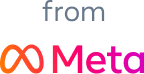

 83%|████████▎ | 91/110 [21:37<08:44, 27.60s/it]

https://medizinlv.comdata:image/svg+xml,%3Csvg%20xmlns=\'http://www.w3.org/2000/svg\'%20viewBox=\'0%200%201024%20689\'%3E%3C/svg%3E
https://medizinlv.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%201024%20681'%3E%3C/svg%3E
https://medizinlv.com
https://medizinlv.comdata:image/svg+xml,%3Csvg%20xmlns=\'http://www.w3.org/2000/svg\'%20viewBox=\'0%200%201024%20683\'%3E%3C/svg%3E
662
The image features a woman wearing a black apron, standing in front of a potted plant. She is smiling and appears to be enjoying her time. The woman is the main focus of the scene, and the potted plant is placed in the background. The overall atmosphere of the image is pleasant and inviting.
The image features a close-up of a marijuana plant with a dense fog surrounding it. The plant is large and occupies a significant portion of the scene. The fog adds a mysterious and atmospheric quality to the image, emphasizing the plant's presence in the environment.
The image features a
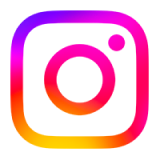

 85%|████████▍ | 93/110 [21:52<05:32, 19.58s/it]

https://lemonnadedenver.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20146'%3E%3C/svg%3E
https://lemonnadedenver.comdata:image/svg+xml,%3Csvg%20xmlns=\'http://www.w3.org/2000/svg\'%20viewBox=\'0%200%20300%20146\'%3E%3C/svg%3E
https://lemonnadedenver.comdata:image/svg+xml,%3Csvg%20xmlns=\'http://www.w3.org/2000/svg\'%20viewBox=\'0%200%200%200\'%3E%3C/svg%3E
https://lemonnadedenver.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%200%200'%3E%3C/svg%3E
https://lemonnadedenver.comdata:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20300%20146'%3E%3C/svg%3E
664
The image features a green and black square with a checklist. The checklist consists of four boxes, each with a number from 1 to 4. The boxes are arranged in a way that makes it easy to identify each box. The green and black color scheme gives the checklist a visually appealing appearance.
The image features a shopping cart icon,

 87%|████████▋ | 96/110 [22:26<03:15, 14.00s/it]

666

https://mint-cannabis.comhttps://static.wixstatic.com/media/eb940f_6e227c5a6bc14ffcaad99fa1101f76cd~mv2.png/v1/fill/w_96,h_96,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/eb940f_6e227c5a6bc14ffcaad99fa1101f76cd~mv2.png
https://mint-cannabis.comhttps://static.wixstatic.com/media/8bc6ee_3eb50c3d04be49799c09649ae49b5423~mv2.png/v1/fill/w_123,h_123,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/8bc6ee_3eb50c3d04be49799c09649ae49b5423~mv2.png
https://mint-cannabis.comhttps://static.wixstatic.com/media/8bc6ee_3eb50c3d04be49799c09649ae49b5423~mv2.png/v1/fill/w_44,h_44,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/8bc6ee_3eb50c3d04be49799c09649ae49b5423~mv2.png
https://mint-cannabis.comhttps://static.wixstatic.com/media/8bc6ee_3eb50c3d04be49799c09649ae49b5423~mv2.png/v1/fill/w_43,h_43,al_c,q_85,usm_0.66_1.00_0.01,blur_2,enc_auto/8bc6ee_3eb50c3d04be49799c09649ae49b5423~mv2.png
https://mint-cannabis.comhttps://static.wixstatic.com/media/8d2399_d5593c75bb654874bff72d49c966643a~mv2.jpg/v1/fill/w

 88%|████████▊ | 97/110 [22:27<02:23, 11.04s/it]

https://apothecareannarbor.comhttps://images.squarespace-cdn.com/content/v1/5fc42c08a772ae50fb28cf14/1606691848627-OR69JQA968YD102F2MKU/apothecare_about_us_organic_cannabis_03.jpg
https://apothecareannarbor.comhttps://images.squarespace-cdn.com/content/v1/5fc42c08a772ae50fb28cf14/1607483416161-0SQXL0CFKXM6GABYJOLE/FallBack.jpg
https://apothecareannarbor.comhttps://images.squarespace-cdn.com/content/v1/5fc42c08a772ae50fb28cf14/1606691848640-QE3D0USW6JU3EJ9X0GVD/apothecare_VIP_program.jpg
https://apothecareannarbor.comhttps://images.squarespace-cdn.com/content/v1/5fc42c08a772ae50fb28cf14/1606691848637-1GGXGS4CKDTS1V7S19L0/award+winning+sundae+driver
https://apothecareannarbor.comhttps://images.squarespace-cdn.com/content/v1/5fc42c08a772ae50fb28cf14/1606691848630-C7DDUH6DNYD3ZWVSJ67I/certified+organic+flower
668

https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1657214455239-KT7BAR3WVHU8BAKK3ZM2/Defyne+Wings+Lobby.jpg
https://defyne.lifehttps://ima

 89%|████████▉ | 98/110 [22:27<01:42,  8.51s/it]

https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1657214448950-UYEUPY9EFSQ7KU3GAT5X/Defyne+Apparel+Discount+7.26.jpg
https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1657214447115-TQRS2C98B72LMR6XJ66R/Daily+Sales.jpg
https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1657214442671-UIC2IYLRCWUHEX5QHGBS/Birthday.jpg
https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1672099624570-BDM5VADMSIL4NZX63CXG/Ounce+Sale+copy.jpg
https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1694539030725-LI7CWLB8W2I2BCV3VXO9/Flower+Special+Lobby.jpg
https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1685379589692-T639C25AC17DWUQ8JF6S/Foodie+Fridays+Lobby.jpg
https://defyne.lifehttps://images.squarespace-cdn.com/content/v1/5b314a9dcc8fedadb0def333/1657214531196-EN6WXM65P922UV

 90%|█████████ | 99/110 [22:27<01:10,  6.40s/it]

671

https://satchelpdx.com/wp-content/uploads/20180921_123622-1-2400x1800.jpg


 93%|█████████▎| 102/110 [22:28<00:24,  3.02s/it]

672

https://theportlandpotshop.comhttps://static.wixstatic.com/media/e77d3e_b56ae70ad8554a27a4b63646f285c883~mv2.png/v1/fill/w_136,h_49,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Portland%20Pot%20Shop%20Black%20flames.png
https://theportlandpotshop.comhttps://static.wixstatic.com/media/e77d3e_d3339a9ccdc04ffca8316300ed2ae0ff~mv2.jpg/v1/crop/x_0,y_121,w_640,h_558,q_80,blur_2,enc_auto/e77d3e_d3339a9ccdc04ffca8316300ed2ae0ff~mv2.jpg
https://theportlandpotshop.com
https://theportlandpotshop.comhttps://static.wixstatic.com/media/e77d3e_d9facbabc4a147039560da1ae810af61~mv2.png/v1/fill/w_90,h_123,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/AND.png
https://theportlandpotshop.comhttps://static.wixstatic.com/media/e77d3e_b56ae70ad8554a27a4b63646f285c883~mv2.png/v1/fill/w_136,h_49,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Portland%20Pot%20Shop%20Black%20flames.png
https://theportlandpotshop.comhttps://static.wixstatic.com/media/e77d3e_721f23f643d84b31bbe792dc7eba54c6~mv2.jpg/v1/fill/w_115,h_95,al_c,q_80,usm_0.
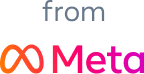
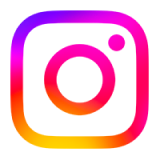

 94%|█████████▎| 103/110 [22:28<00:16,  2.31s/it]

https://theherberynw.comhttps://static.wixstatic.com/media/ad3023_e57d45df717f4368a184baa641fdc37e~mv2.png/v1/fill/w_62,h_61,al_c,q_85,blur_3,enc_auto/icon_capsules.png
https://theherberynw.comhttps://static.wixstatic.com/media/ad3023_a43f96056fd945039136fa98e73fa6bc~mv2.png/v1/fill/w_47,h_43,al_c,q_85,usm_0.66_1.00_0.01,blur_3,enc_auto/image_2021-08-05_173220.png
https://theherberynw.comhttps://static.wixstatic.com/media/ad3023_2c7be4c3c6f844c889135b3b29b45df6~mv2.png/v1/fill/w_591,h_216,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/The-Herbery-Logo.png
https://theherberynw.comhttps://static.wixstatic.com/media/035244_416dccab97ba4b6082f866ac15996cb0~mv2.png/v1/fill/w_26,h_26,al_c,q_85,usm_0.66_1.00_0.01,blur_3,enc_auto/035244_416dccab97ba4b6082f866ac15996cb0~mv2.png
https://theherberynw.comhttps://static.wixstatic.com/media/ad3023_c759831f610c4dd38d838b7e78e3ea45~mv2.png/v1/fill/w_52,h_60,al_c,q_85,usm_0.66_1.00_0.01,blur_3,enc_auto/icon_flower.png
674

https://high5cannabis.comhttps://stati

 95%|█████████▍| 104/110 [22:29<00:10,  1.79s/it]

676

https://p37cannabis.com/media/AdobeStock_244008692.jpeg
https://p37cannabis.com/media/body-min.png
https://p37cannabis.com/media/Flower17.jpg
https://p37cannabis.com/media/flower.jpg
https://p37cannabis.com/media/Flower17-1.jpg
https://p37cannabis.com/media/Flower12.jpg
https://p37cannabis.com/media/protest-image.jpg
https://p37cannabis.com/media/AdobeStock_328060117.jpeg
https://p37cannabis.com/media/Flower2.jpg
https://p37cannabis.com/wp-content/plugins/instagram-feed/img/placeholder.png
https://p37cannabis.com/media/Gold-Dust.jpg
https://p37cannabis.com/wp-content/plugins/instagram-feed/img/placeholder.png


 96%|█████████▋| 106/110 [23:38<01:03, 15.83s/it]

677
The image features a close-up view of a spoonful of honey, showcasing its golden color and smooth texture. The honey is placed on a black background, which emphasizes the vibrant hue of the honey. The spoon is positioned in the foreground, with the honey filling the majority of the frame. The scene captures the essence of the honey, highlighting its natural beauty and sweetness.
The image features a close-up of a human body, focusing on the spinal cord and nerves. The spinal cord is depicted as a long, thin line, extending from the top of the image to the bottom. The nerves are also shown, branching out from the spinal cord and intertwining with each other.

The image is in black and gold colors, giving it a vintage or artistic appearance. The close-up view of the human body highlights the intricate structure of the spinal cord and nerves, making it an interesting and educational visual.
The image features a close-up view of a marijuana plant with a large, dense bud. The plant is c

100%|██████████| 110/110 [24:21<00:00, 13.28s/it]

680
The image features a storefront for a marijuana dispensary, with a green neon sign illuminating the store. The storefront is adorned with several signs, including a large one that reads "Score 420." The store is open for business, and the neon lights create a welcoming atmosphere for customers.
The image features a green door with a white sign on it, possibly advertising a business or event. The sign is placed on the door, making it easily visible to passersby. The scene appears to be set in a building, with the green door being the focal point.
The image features a green building with a large window, likely a restaurant or a store. The building has a sign on the side, indicating that it is open for business. The window is adorned with a sign, possibly providing information about the establishment or its offerings. The scene appears to be set during the day, with the sun shining brightly on the building.
The image features a storefront with a large neon sign that reads "Open." The 

In [ ]:
for i in tqdm(range(572, len(df))):
  base_url = df['url'][i]
  if pd.notnull(df['homepage_links'][i]):
    homepage_links = ast.literal_eval(df['homepage_links'][i])
  else:
    homepage_links = []

  if pd.notnull(df['Subpage_links'][i]):
    subpage_links = ast.literal_eval(df['Subpage_links'][i])
  else:
    subpage_links = []

  image_links = homepage_links[:10] + subpage_links[:15]
  image_text = ""
  for index, image_url in enumerate(image_links):
    image_url = format_image_url(image_url, base_url)
    print(image_url)
    try:
      image = Image.open(requests.get(image_url, stream=True).raw)
    except Exception as e:
      continue
    prompt = "USER: <image>\nDescribe the image to me?\nASSISTANT:"
    try:
      outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    except Exception as e:
      continue

    text = outputs[0]["generated_text"]
    assistant_text = text.split("ASSISTANT:")[1].strip()
    image_text += f"{assistant_text}\n"

  df['Description_llava'][i] = image_text
  print(i)
  print(image_text)
  if i%5 == 0:
    excel_file_path = 'dataframe_output5.xlsx'
    df.to_excel(excel_file_path, index=False)



In [ ]:
excel_file_path = 'dataframe_output5.xlsx'
df.to_excel(excel_file_path, index=False)

In [ ]:
  # base_url = 'https://' + df['url'][34]
  # image_links = (ast.literal_eval(df['homepage_links'][34]))[:10] + (ast.literal_eval(df['Subpage_links'][34]))[:15]
  # image_text = ""
  # for index, image_url in enumerate(image_links):
  #   image_url = format_image_url(image_url, base_url)
  #   print(image_url)

In [ ]:
image_url = "https://fastporndelivery.hqporner.com/imgs/83/15/c143b878f1f1566_main.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
print(image)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7c7bb8509f80>